In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from pyod.models.iforest import IForest
import numpy as np
from sklearn.metrics import classification_report
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from sklearn.metrics import accuracy_score
from pyod.models.pca import PCA

import warnings
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import evaluate_print
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.stats import ConstantInputWarning

warnings.simplefilter("ignore", ConstantInputWarning)


In [4]:
df=pd.read_csv("/Users/saikarthik/Desktop/Nexus-S1 Deakin /cleaned.csv")

In [ ]:
df.columns

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [13]:
df.columns

Index(['timestamp', 'value', 'true_labels'], dtype='object')

In [6]:
mean_value = df['value'].mean()
std_dev_value = df['value'].std()

In [7]:
threshold_upper = mean_value + (1.25 * std_dev_value)
threshold_lower = mean_value -( 3 * std_dev_value)

In [8]:
def label_anomalies(value):
    if value > threshold_upper or value < threshold_lower:
        return 1  
    else:
        return 0  



In [9]:
df['true_labels'] = df['value'].apply(label_anomalies)


In [10]:
df["true_labels"].value_counts()

true_labels
0    22042
1      653
Name: count, dtype: int64

In [ ]:
scaler = StandardScaler()
X = df[['value']].values
X_scaled = scaler.fit_transform(X)

# Essembled Based 

## Isolation Forest 

In [11]:
X = df[['value']].values


In [ ]:
clf = IForest(contamination=0.1, random_state=42)

In [ ]:
clf.fit(X)


In [ ]:
y_pred_if = clf.predict(X) 

In [ ]:
y_scores_if= clf.decision_function(X)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')
plt.scatter(df['timestamp'][y_pred_if== 1], df['value'][y_pred_if== 1], 
            color='red', marker='x', label='Detected Anomalies (HBOS)')
plt.scatter(df['timestamp'][df['true_labels'] == 1], df['value'][df['true_labels'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies')
plt.title('Time Series Anomaly Detection using Isolation Forest (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print(classification_report(df['true_labels'], y_pred_if))


In [ ]:
accuracy = accuracy_score(df['true_labels'], y_pred_if)
accuracy*100

# Proximity Based 

## HBOS

In [ ]:
clf_hbos = HBOS()
clf_hbos.fit(X)

In [ ]:
y_predict_hbos = clf_hbos.predict(X)

In [ ]:
y_scores_hbos=clf_hbos.decision_function(X)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')
plt.scatter(df['timestamp'][y_predict_hbos == 1], df['value'][y_predict_hbos == 1], 
            color='red', marker='x', label='Detected Anomalies (HBOS)')
plt.scatter(df['timestamp'][df['true_labels'] == 1], df['value'][df['true_labels'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies')
plt.title('Time Series Anomaly Detection using HBOS (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print(classification_report(df['true_labels'], y_predict_hbos ))


In [ ]:
accuracy = accuracy_score(df['true_labels'], y_predict_hbos)
accuracy*100

## KNN 

In [ ]:
clf_knn = KNN()
clf_knn.fit(X)

In [ ]:
y_predict_knn = clf_knn.predict(X)
y_scores_knn = clf_knn.decision_function(X)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')
plt.scatter(df['timestamp'][y_predict_knn == 1], df['value'][y_predict_knn == 1], 
            color='red', marker='x', label='Detected Anomalies (kNN)')
plt.scatter(df['timestamp'][df['true_labels'] == 1], df['value'][df['true_labels'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies')
plt.title('Time Series Anomaly Detection using kNN (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print(classification_report(df['true_labels'], y_predict_knn))


In [ ]:
accuracy = accuracy_score(df['true_labels'], y_predict_knn)
accuracy*100

# Linear Model

In [12]:
scaler = StandardScaler()
X = df[['value']].values
X_scaled = scaler.fit_transform(X)

In [16]:
clf_pca = PCA(n_components=1, contamination=0.1)
clf_pca.fit(X_scaled)


PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=1,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [17]:
y_predict_pca = clf_pca.predict(X_scaled)
y_scores_pca = clf_pca.decision_function(X_scaled)

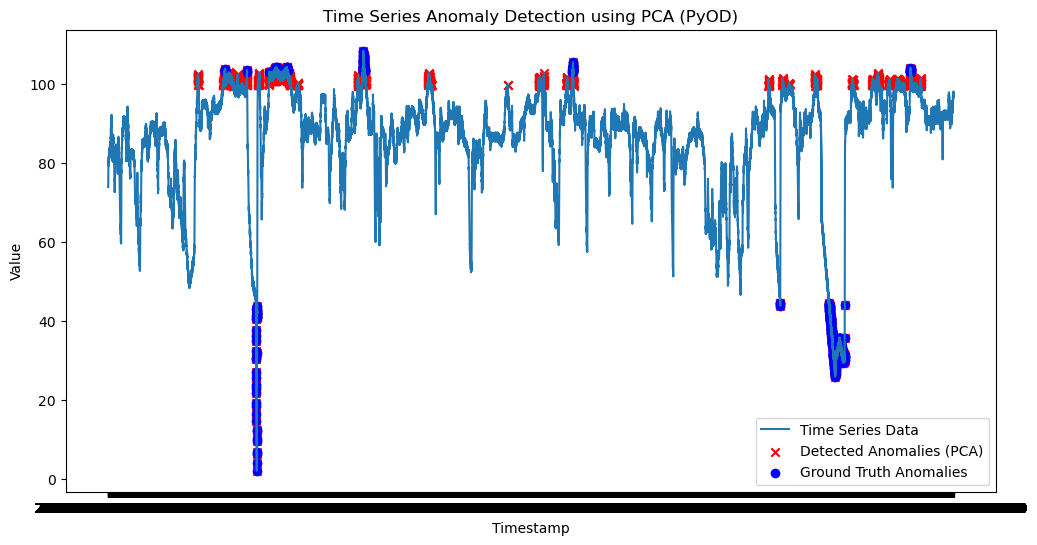

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['value'], label='Time Series Data')
plt.scatter(df['timestamp'][y_predict_pca == 1], df['value'][y_predict_pca == 1], 
            color='red', marker='x', label='Detected Anomalies (PCA)')
plt.scatter(df['timestamp'][df['true_labels'] == 1], df['value'][df['true_labels'] == 1], 
            color='blue', marker='o', label='Ground Truth Anomalies')
plt.title('Time Series Anomaly Detection using PCA (PyOD)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [19]:
print(classification_report(df['true_labels'], y_predict_pca))
accuracy = accuracy_score(df['true_labels'], y_predict_pca)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     22042
           1       0.29      1.00      0.45       653

    accuracy                           0.93     22695
   macro avg       0.64      0.96      0.70     22695
weighted avg       0.98      0.93      0.95     22695



In [20]:
accuracy *100

92.87508261731658

# Neural Network 